Import needed libraries for data processing, visualizaiton and modeling of data

In [19]:
import warnings;
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet


In [20]:
df = pd.read_csv("dataset.csv") # import dataset
df # displays the head and tail of the dataset

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [21]:
df.describe() # displays the statistical summary of the dataset

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [22]:
print(df['Product'].unique()) # displays the unique products in the dataset
print(df['Store'].unique()) # displays the unique stores in the dataset

[2667437]
['QLD_CW_ST0203']


In [23]:
df.dtypes # displays the data types of the dataset

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [24]:
# convert date to datetime
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:]) # extract year from the date
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4]) # extract month from the date
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6]) # extract day from the date
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day']) # create a new column 'ds' with the date


In [26]:
df # displays the head and tail of the dataset after modification

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5,2018-01-05
...,...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15


In [27]:
df.dtypes # displays the data types of the dataset after modification

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [28]:
df.drop(['Time Date','Product','Store','Year','Month','Day'], axis=1, inplace=True) # drop the columns that are not needed
df # displays the head and tail of the dataset after modification

,Value,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [29]:
df.columns = ['y', 'ds'] # rename the columns

In [30]:
df # displays the head and tail of the dataset after modification

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


2. Train Model

In [31]:
model = Prophet(interval_width=0.95, daily_seasonality=True) # create a model with 95% confidence interval and daily seasonality
model.fit(df) # fit the model with the dataset

04:11:33 - cmdstanpy - INFO - Chain [1] start processing
04:11:33 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# forecast some days
future = model.make_future_dataframe(periods=10) # forecast 10 days into the future
forecast = model.predict(future) # predict the forecast for the future
forecast[['ds','yhat']] # display the forecast and the date

,ds,yhat
0,2018-01-01,2405.949560
1,2018-01-02,2396.511167
2,2018-01-03,2423.027170
3,2018-01-04,2470.701889
4,2018-01-05,2435.367255
...,...,...
1085,2020-12-22,3346.708622
1086,2020-12-23,3366.919998
1087,2020-12-24,3406.762771
1088,2020-12-25,3362.462230


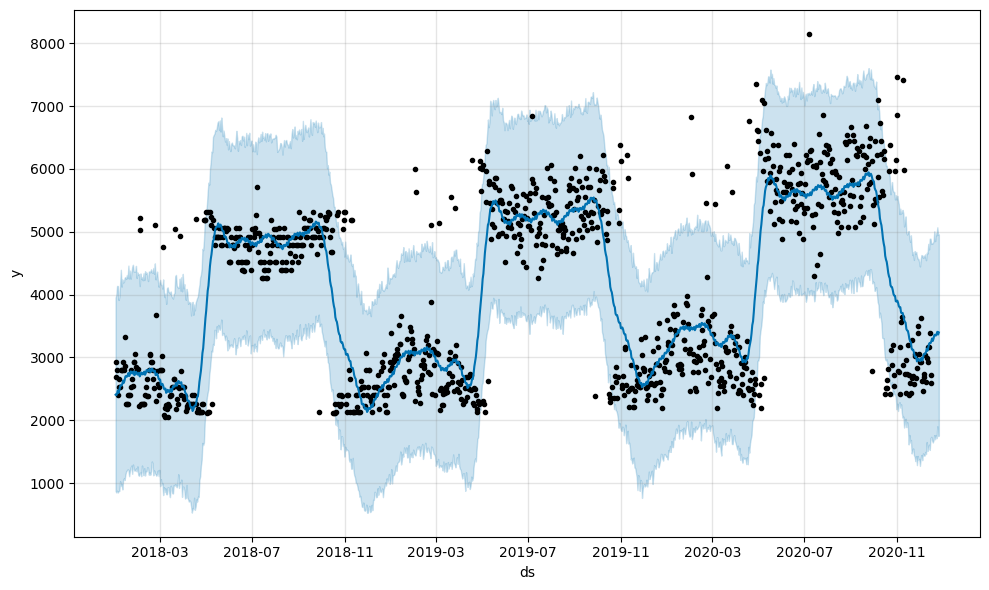

In [33]:
plot_1 = model.plot(forecast) # plot the forecasted data

Blue line shows prediction, black dots shows the actual data points

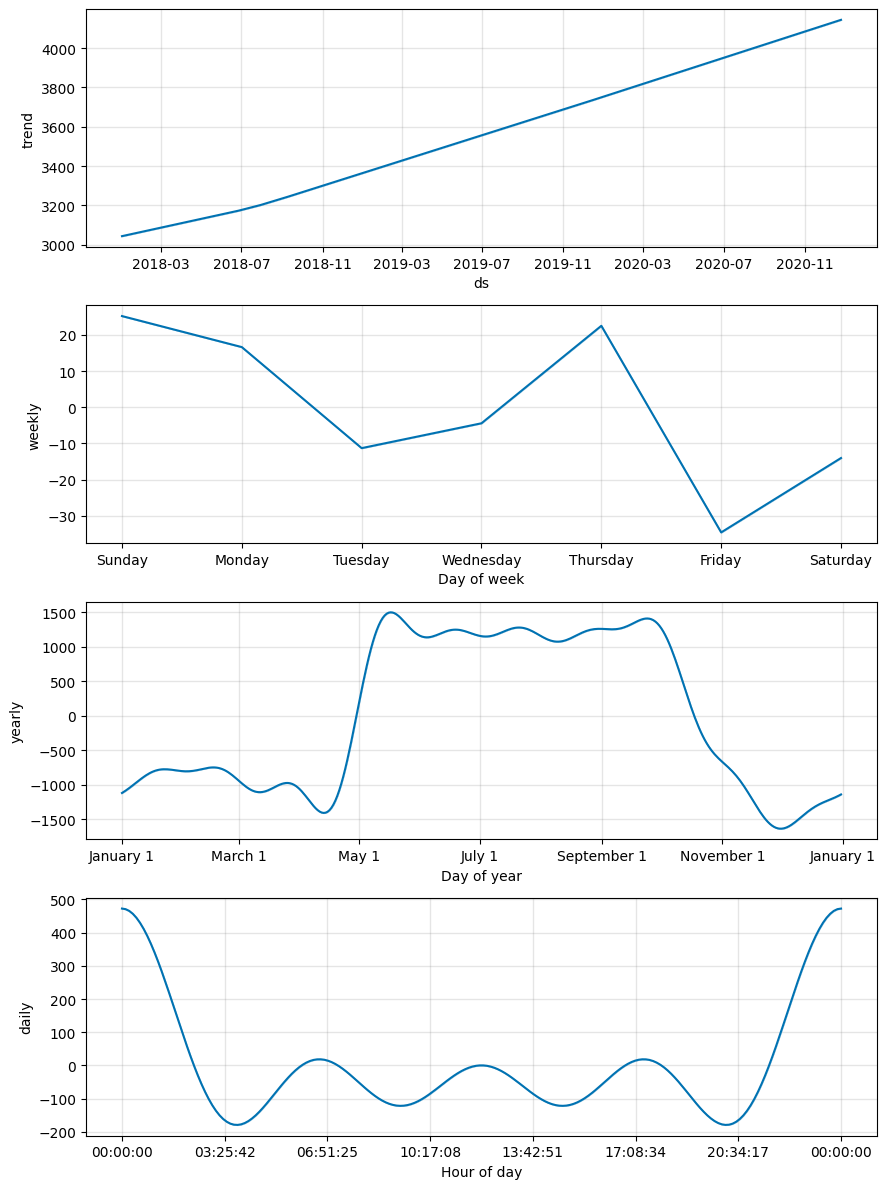

In [35]:
plot_2 = model.plot_components(forecast) # plot the components of the forecasted data